In [1]:
import os
os.chdir('/data/wjk/Workspace/Datasets/IGR')

import os.path as osp
import pandas as pd
pd.set_option('display.width', 500)    #设置整体宽度
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mtools import plot_cdf, plot_fig, load_json

df = pd.read_csv('Output/stat_df.csv')
exclude_phone = ['Mi8', 'Mate30']
df=df[~df.isin(exclude_phone)]
print(df.groupby('phone').mean(numeric_only=True))
df["err_h"]*=100
df["err_x"]*=100
df["err_y"]*=100
pdf = df.rename(columns={'err_x':'Noise east (cm)','err_y':'Noise north (cm)', 'phone':'Device'})

route_type_dict = load_json(osp.join('plots', 'route_type_dict.json'))
pdf["Route type"] = pdf["trip"]
for route in route_type_dict:
    pdf.loc[pdf.__getattr__("Route type") == route, ('Route type')] = route_type_dict[route]

                err_x     err_y     err_h      gt_x      gt_y
phone                                                        
Mate50       0.000146  0.000154  0.128566  0.302436  0.120335
Mi11         0.000565 -0.000526  0.121998  0.289952  0.123011
Nova9pro     0.000422 -0.001167  0.135489  0.116362  0.022865
Oneplus9pro  0.001197 -0.002175  0.141066  0.117728  0.022167
Oneplus9r    0.000760  0.000445  0.196004  0.302781  0.118726
Pixel4       0.000688  0.001625  0.195865  0.119025  0.023737
RedmiK40     0.000443 -0.000589  0.145149  0.115332  0.022161
Vivox60     -0.000804 -0.001395  0.266833  0.299227  0.119574


In [2]:
# df[["err_x","err_y","gt_x","gt_y"]].corr().to_csv('Output/corr.csv')

des_all = df["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9]).to_frame().T
print(des_all)
print(f'{df["err_h"].mean():.2f}')

des = df.groupby('phone')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(pd.concat((des, des_all)))
pd.concat((des, des_all)).to_csv('Output/err_h_des_new.csv')

         count       mean        std       min       20%       25%        50%        75%        80%        90%         max
err_h  36481.0  19.540607  21.479395  0.033995  6.684574  7.769191  13.600008  23.752162  27.302448  39.845229  708.221474
19.54
               count       mean        std       min        20%        25%        50%        75%        80%        90%         max
Mate50        2936.0  12.856556  15.265726  0.102887   4.781646   5.429584   9.312362  15.184783  17.352306  24.640285  409.916330
Mi11          3057.0  12.199846  13.471894  0.228037   5.247393   5.950300   9.685208  14.953653  16.344009  21.486612  429.039833
Nova9pro      3913.0  13.548898  15.710502  0.203041   5.722180   6.571617  10.577726  16.495219  18.206874  25.561682  705.148510
Oneplus9pro   3918.0  14.106604  16.747982  0.068005   5.210548   5.954238  10.197793  17.695310  20.185233  29.272466  708.221474
Oneplus9r     2934.0  19.600422  17.979280  0.033995   7.508766   8.662185  15.152334  25.421

In [3]:
des = pdf.groupby('Route type')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
pd.concat((des, des_all)).to_csv('Output/err_h_des_type_new.csv')

              count       mean        std       min       20%       25%        50%        75%        80%        90%         max
Route type                                                                                                                     
Blocked     19930.0  24.034517  26.180484  0.102887  7.999289  9.334995  16.503715  29.398873  34.176077  50.713570  708.221474
Open        10628.0  13.878638  10.833993  0.033995  5.599759  6.388460  11.018940  18.466949  20.675360  27.595596  150.510044
SemiOpen     5923.0  14.578898  13.217054  0.172478  5.947724  6.805496  11.098542  17.733418  19.992305  28.374082  282.380424


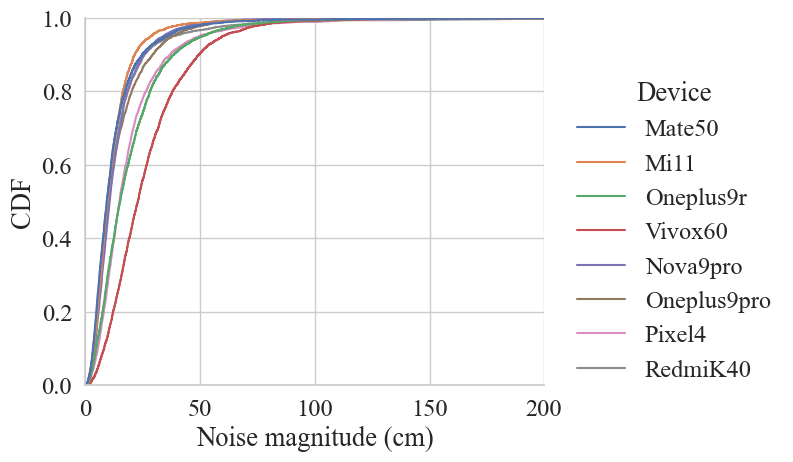

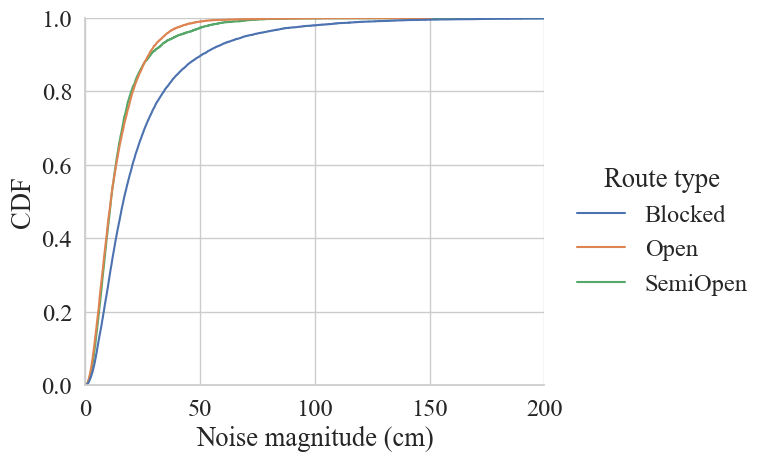

In [4]:
# g = plot_cdf(df, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], plot_params={'aspect':1.2})
# plt.show()
# g.savefig('Figures/err_h_cdf.png', dpi=150, pad_inches=0.2)

g = plot_cdf(pdf, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], plot_params={'aspect':1.2, 'hue':'Device'}) # 'col':'phone', 'col_wrap': 4
plt.show()
# g.savefig('Figures/err_h_cdf_byphone_new.png', dpi=150, pad_inches=0.2)

g = plot_cdf(pdf, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], plot_params={'aspect':1.2, 'hue':'Route type'}) # 'col':'phone', 'col_wrap': 4
plt.show()
# g.savefig('Figures/err_h_cdf_bytype_new.png', dpi=150, pad_inches=0.2)

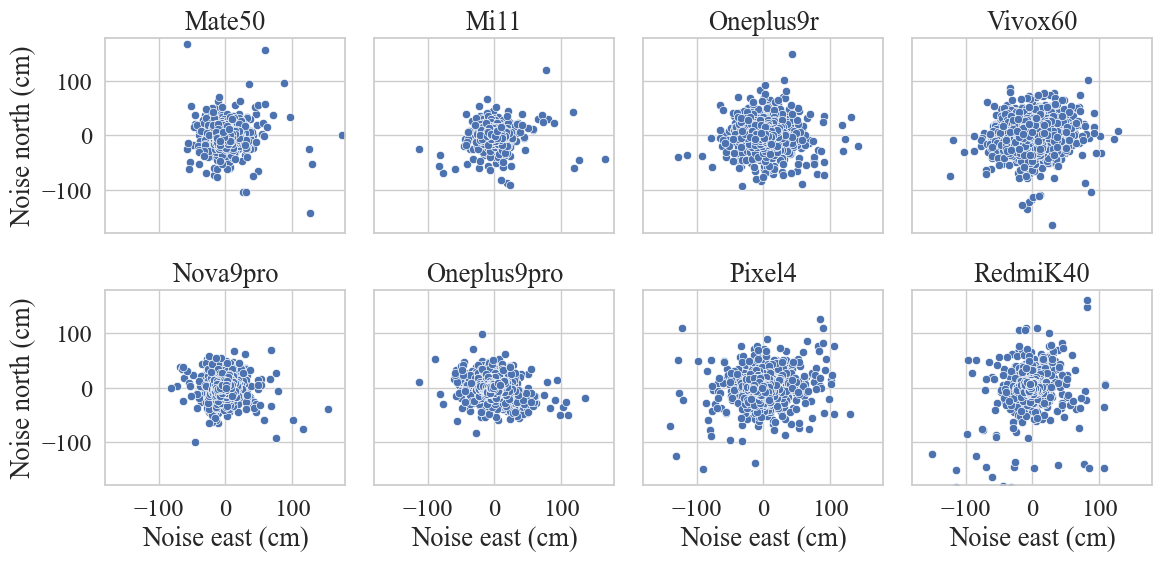

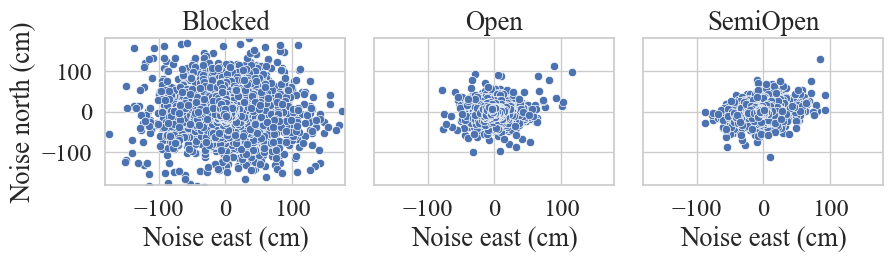

In [5]:
g = sns.FacetGrid(pdf, col="Device",  col_wrap=4, xlim=[-180, 180], ylim=[-180, 180], despine=False)
g.map(sns.scatterplot, "Noise east (cm)", "Noise north (cm)")
g.set_titles("{col_name}")
plt.show()
g.savefig('Figures/err_scatter_byphone_new.png', dpi=150, pad_inches=0.2)

g = sns.FacetGrid(pdf, col="Route type",  col_wrap=4, xlim=[-180, 180], ylim=[-180, 180], despine=False)
g.map(sns.scatterplot, "Noise east (cm)", "Noise north (cm)")
g.set_titles("{col_name}")
plt.show()
g.savefig('Figures/err_scatter_bytype_new.png', dpi=150, pad_inches=0.2)

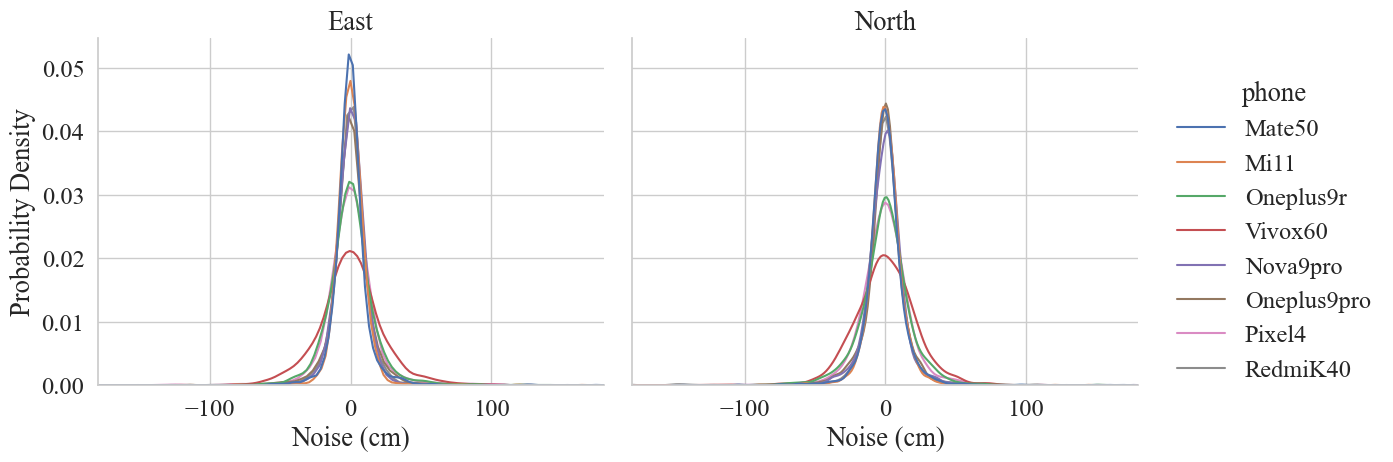

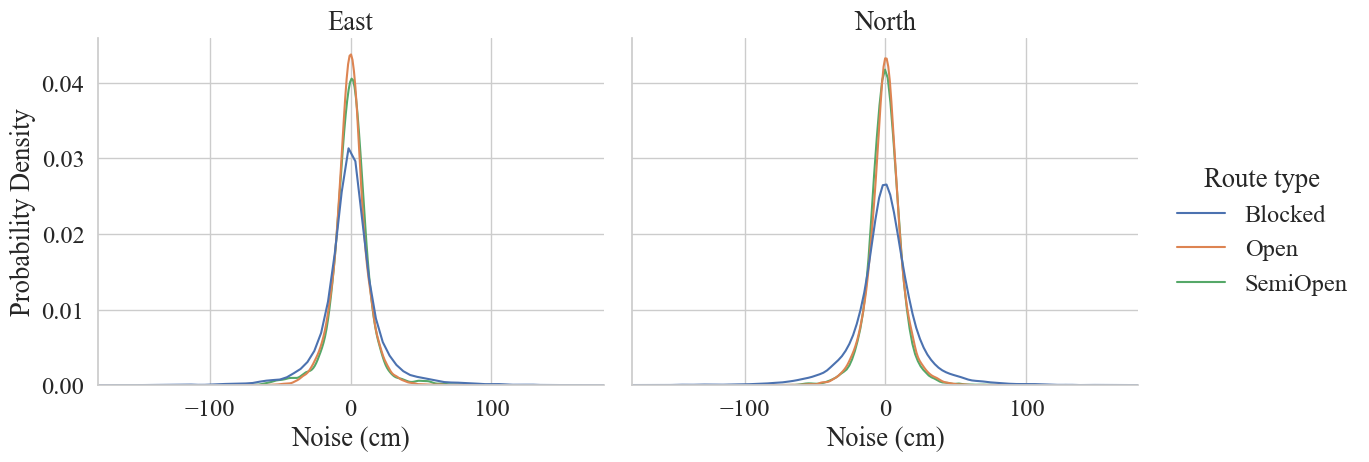

In [6]:
new_df = pd.DataFrame({
    'err': np.hstack((df['err_x'].values, df['err_y'].values)),
    'phone': np.hstack((df['phone'].values, df['phone'].values)),
    'type': ['East']*len(pdf) + ['North']*len(pdf)
})
g = plot_fig(sns.displot, new_df, xlim=[-180, 180], xlabel='Noise (cm)', ylabel='Probability Density', fig_param={}, plot_params={'x':'err', 'kind':'kde', 'aspect':1.2, 'hue':'phone', 'common_norm':False, 'col': 'type'}) # , 'hue_norm':[0.0, 1.0] , 'hue_norm':(0.0, 1.0)
g.set_titles("{col_name}")
plt.show()
g.savefig('Figures/err_dist_byphone_new.png', dpi=150, pad_inches=0.2)

new_df = pd.DataFrame({
    'err': np.hstack((df['err_x'].values, df['err_y'].values)),
    'Route type': np.hstack((pdf['Route type'].values, pdf['Route type'].values)),
    'type': ['East']*len(pdf) + ['North']*len(pdf)
})
g = plot_fig(sns.displot, new_df, xlim=[-180, 180], xlabel='Noise (cm)', ylabel='Probability Density', fig_param={}, plot_params={'x':'err', 'kind':'kde', 'aspect':1.2, 'hue':'Route type', 'common_norm':False, 'col': 'type'}) # 
g.set_titles("{col_name}")
plt.show()
g.savefig('Figures/err_dist_bytype_new.png', dpi=150, pad_inches=0.2)